In [1]:
# Importing the libraries
from DBN import DBN
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

In [2]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('/Users/Lenovo/git/MNIST', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

In [3]:
mnist_data_train = (mnist_data.train_data.type(torch.FloatTensor)/255).bernoulli()

/Users/Lenovo/Anaconda3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [4]:
mnist_data_train.shape

torch.Size([60000, 28, 28])

#Lets us visualize a number from the data set
idx = 5
img = mnist_data_train[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [5]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
dbn_mnist = DBN(visible_units=28*28 ,
                hidden_units=[23*23 ,18*18] ,
                k = 5,
                learning_rate = 0.1,
                learning_rate_decay = True,
                xavier_init = True,
                increase_to_cd_k = False,
                use_gpu = False)

In [6]:
num_epochs = 1
batch_size = 10

dbn_mnist.train_static(mnist_data_train,mnist_data.train_labels,num_epochs , batch_size)

--------------------
Training the 1 st rbm layer
RBM fitting: 8it [00:00, 74.07it/s]

/Users/Lenovo/Anaconda3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


RBM fitting: 6000it [00:29, 205.72it/s]
Epoch:1 ,avg_cost = 0.5388303399085999 ,std_cost = 0.12099435925483704 ,avg_grad = 7324.6337890625 ,std_grad = 1388.0028076171875
--------------------
Training the 2 st rbm layer
RBM fitting: 6000it [00:18, 319.89it/s]
Epoch:1 ,avg_cost = 1.0777671337127686 ,std_cost = 0.13248395919799805 ,avg_grad = 6789.61279296875 ,std_grad = 498.4856262207031


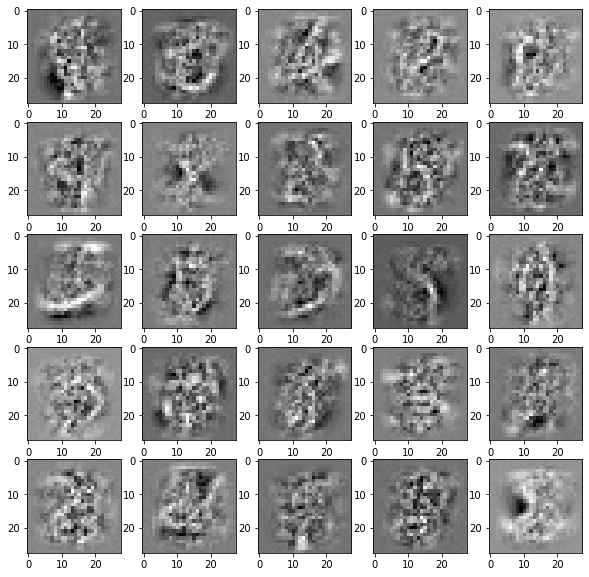

In [7]:
# visualising layer 1
learned_weights = dbn_mnist.rbm_layers[0].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

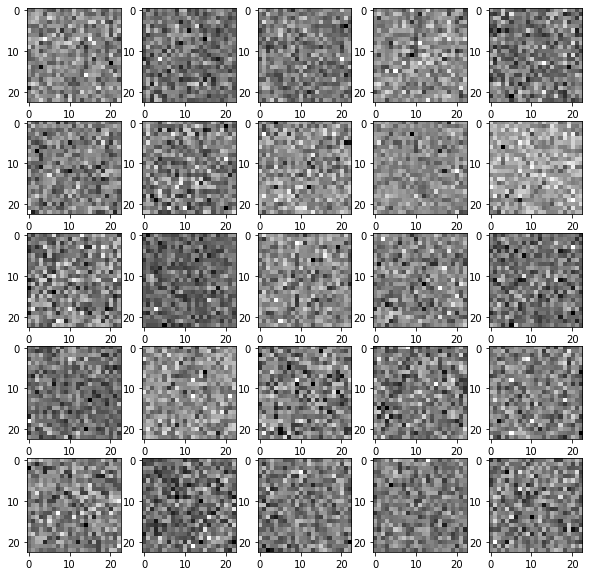

In [8]:
# visualising layer 2
learned_weights = dbn_mnist.rbm_layers[1].W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((23,23)), cmap=plt.cm.gray)
plt.show()

number = 5 #A number between 0 and 10.

particular_mnist = []

limit = mnist_data_train.shape[0]
for i in range(limit):
    if(mnist_data.train_labels[i] == number):
        particular_mnist.append(mnist_data_train[i].numpy())
# particular_mnist = np.array(particular_mnist)
len(particular_mnist)
# mnist_data.train_data

train_data = torch.stack([torch.Tensor(i) for i in particular_mnist])
train_label = torch.stack([torch.Tensor(number) for i in range(len(particular_mnist))])

In [9]:
train_data = mnist_data_train
train_label = mnist_data.train_labels

In [10]:
num_epochs = 20
batch_size = 10

dbn_mnist.train_static(train_data, train_label, num_epochs , batch_size)

--------------------
Training the 1 st rbm layer
RBM fitting: 6000it [00:27, 214.73it/s]
Epoch:1 ,avg_cost = 0.46507203578948975 ,std_cost = 0.04656539857387543 ,avg_grad = 7390.26708984375 ,std_grad = 427.5047302246094
RBM fitting: 6000it [00:26, 228.52it/s]
Epoch:2 ,avg_cost = 0.4113452136516571 ,std_cost = 0.04211651161313057 ,avg_grad = 8753.0419921875 ,std_grad = 693.4757690429688
RBM fitting: 6000it [00:24, 247.54it/s]
Epoch:3 ,avg_cost = 0.3834022581577301 ,std_cost = 0.040102723985910416 ,avg_grad = 9567.958984375 ,std_grad = 586.0344848632812
RBM fitting: 6000it [00:27, 216.85it/s]
Epoch:4 ,avg_cost = 0.36539769172668457 ,std_cost = 0.038841571658849716 ,avg_grad = 9814.244140625 ,std_grad = 608.5769653320312
RBM fitting: 6000it [00:27, 220.17it/s]
Epoch:5 ,avg_cost = 0.35275769233703613 ,std_cost = 0.038251448422670364 ,avg_grad = 9910.23828125 ,std_grad = 623.242431640625
RBM fitting: 6000it [00:28, 214.26it/s]
Epoch:6 ,avg_cost = 0.34312647581100464 ,std_cost = 0.0373160801

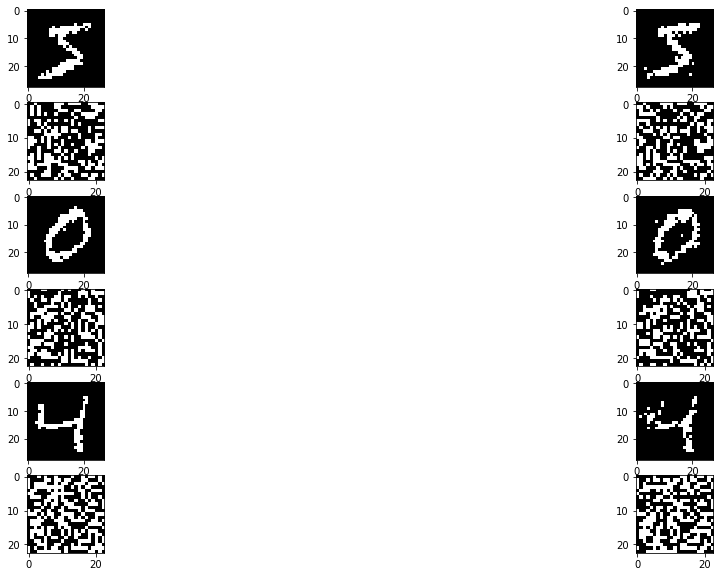

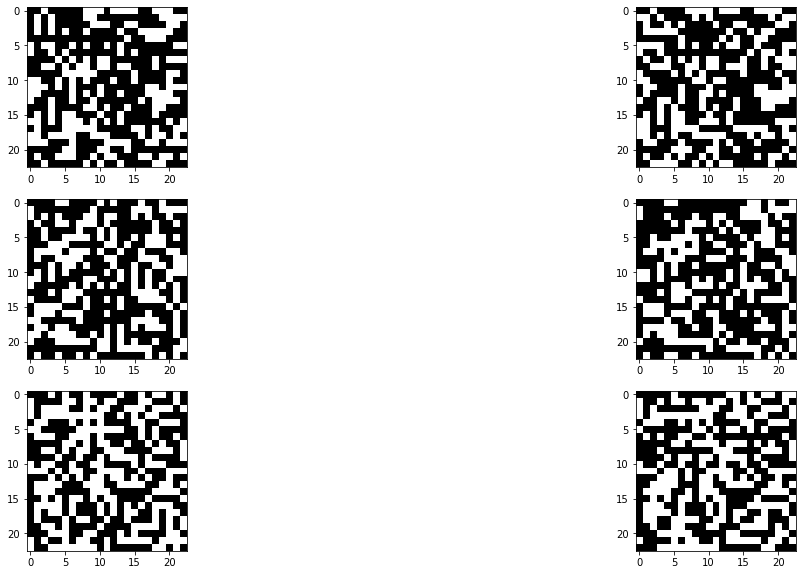

In [37]:
n_demo = 3

h_sizes = [28,23,18]
v_sizes = [23,28]

fig1 = plt.figure(figsize=(20,10))
fig2 = plt.figure(figsize=(20,10))

for idx in range(n_demo):

    img = mnist_data_train[idx]
    reconstructed_img = img.view(1,-1).type(torch.FloatTensor)

    ps_h,hs,ps_v,vs = dbn_mnist.reconstruct(reconstructed_img)


    for i in range(2):

        ax1 = fig1.add_subplot(n_demo*2, 2, 2*i+4*idx+1)
        ax1.imshow(hs[i].view(h_sizes[i],h_sizes[i]), cmap = 'gray')
        ax2 = fig1.add_subplot(n_demo*2, 2, 2*i+4*idx+2)
        ax2.imshow(vs[1-i].view(v_sizes[1-i],v_sizes[1-i]), cmap = 'gray')
        
        if i == 1:           

            ax1 = fig2.add_subplot(n_demo, 2, 2*idx+1)
            ax1.imshow(hs[i].view(h_sizes[i],h_sizes[i]), cmap = 'gray')
            ax2 = fig2.add_subplot(n_demo, 2, 2*idx+2)
            ax2.imshow(vs[1-i].view(v_sizes[1-i],v_sizes[1-i]), cmap = 'gray')
    
# fig1.show()
fig1.savefig('../results/ff_fb_compare.png')

# fig2.show()
fig2.savefig('../results/ff_fb_compare_l1.png')